In [1]:
import pandas as pd
from MCForecastTools import MCSimulation
import requests
from dotenv import load_dotenv
import os
import numpy as np
import seaborn as sns
import yfinance as yf
import panel as pn
from panel.interact import interact
from panel import widgets
import plotly.express as px
pn.extension('plotly')


import hvplot.pandas
%matplotlib inline

In [2]:
tickers = input('what do you want to invest in?').split()

what do you want to invest in? AAPL TWTR FB BTC-USD ETH-USD


In [3]:
capital = int(input('how much do you have to invest?'))

how much do you have to invest? 100000


In [4]:
df_portfolio = yf.download(tickers, start='2019-05-07', end='2021-05-07')

[*********************100%***********************]  5 of 5 completed


In [5]:
df_portfolio.head()

Adj Close                                                  \
                 AAPL      BTC-USD     ETH-USD          FB       TWTR   
Date                                                                    
2019-05-07  49.590477  5829.501465  169.798660  189.770004  38.619999   
2019-05-08  49.600250  5982.457520  170.948166  189.539993  38.580002   
2019-05-09  49.067337  6174.528809  170.289307  188.649994  38.790001   
2019-05-10  48.387592  6378.849121  173.142746  188.339996  38.450001   
2019-05-11        NaN  7204.771484  194.304337         NaN        NaN   

                Close                                                  ...  \
                 AAPL      BTC-USD     ETH-USD          FB       TWTR  ...   
Date                                                                   ...   
2019-05-07  50.715000  5829.501465  169.798660  189.770004  38.619999  ...   
2019-05-08  50.724998  5982.457520  170.948166  189.539993  38.580002  ...   
2019-05-09  50.180000  6174.528809  170.289307  188.649994  38.790001  ...   
2019-05-10  49.294998  6378.849121  173.142746  188.339996  38.450001  ...   
2019-05-11        NaN  7204.771484  194.304337         NaN        NaN  ...   

                 Open                                                  \
                 AAPL      BTC-USD     ETH-USD          FB       TWTR   
Date                                                                    
2019-05-07  51.470001  5745.599121  172.427277  192.539993  39.900002   
2019-05-08  50.474998  5849.481445  169.904205  189.389999  38.450001   
2019-05-09  50.099998  5982.316406  170.951874  187.199997  38.110001   
2019-05-10  49.355000  6175.822754  170.312973  188.250000  38.680000   
2019-05-11        NaN  6379.666992  173.139313         NaN        NaN   

                 Volume                                                      
                   AAPL       BTC-USD       ETH-USD          FB        TWTR  
Date                                                                         
2019-05-07  155054800.0  1.802641e+10  8.411140e+09  16253000.0  19283100.0  
2019-05-08  105358000.0  1.532061e+10  6.416570e+09  12505700.0   9168400.0  
2019-05-09  139634400.0  1.678465e+10  6.546914e+09  12967000.0  10010700.0  
2019-05-10  164834800.0  1.941988e+10  8.036919e+09  12578500.0  12259000.0  
2019-05-11          NaN  2.886756e+10  1.257833e+10         NaN         NaN  

[5 rows x 30 columns]

In [6]:
df_closing = df_portfolio['Adj Close'].dropna()
df_closing.tail(10)

AAPL       BTC-USD      ETH-USD          FB       TWTR
Date                                                                    
2021-04-23  134.092239  51093.652344  2363.586182  301.130005  67.019997
2021-04-26  134.491562  54021.753906  2534.481689  303.040009  66.720001
2021-04-27  134.162109  55033.117188  2662.865234  303.570007  66.010002
2021-04-28  133.353485  54824.703125  2746.380127  307.100006  65.699997
2021-04-29  133.253662  53555.109375  2756.876953  329.510010  65.089996
2021-04-30  131.237091  57750.175781  2773.207031  325.079987  55.220001
2021-05-03  132.315247  57200.292969  3431.086182  322.579987  54.580002
2021-05-04  127.633202  53333.539062  3253.629395  318.359985  54.400002
2021-05-05  127.882790  57424.007812  3522.783203  315.019989  53.560001
2021-05-06  129.520004  56396.515625  3490.880371  320.019989  53.810001

In [7]:
# STEP 1 - show the investor the risk assessment of investing in these assets
# retrieve data set
# calculate percent change (daily returns)
# 1st visualization - plot daily returns, possibly plot correlatiob of assets as well
# calculate std from daily returns 
# calculate annualized std then rank assets in terms of riskiness
# calculate sharp ratios 
# 2nd visualization - plot annualized standard deviations and sharp ratios

daily_returns = df_closing.pct_change().dropna()
daily_returns.head()

AAPL   BTC-USD   ETH-USD        FB      TWTR
Date                                                        
2019-05-08  0.000197  0.026238  0.006770 -0.001212 -0.001036
2019-05-09 -0.010744  0.032106 -0.003854 -0.004696  0.005443
2019-05-10 -0.013853  0.033091  0.016756 -0.001643 -0.008765
2019-05-13 -0.058120  0.225129  0.136902 -0.036105 -0.048375
2019-05-14  0.015830  0.022969  0.103138 -0.004462  0.009292

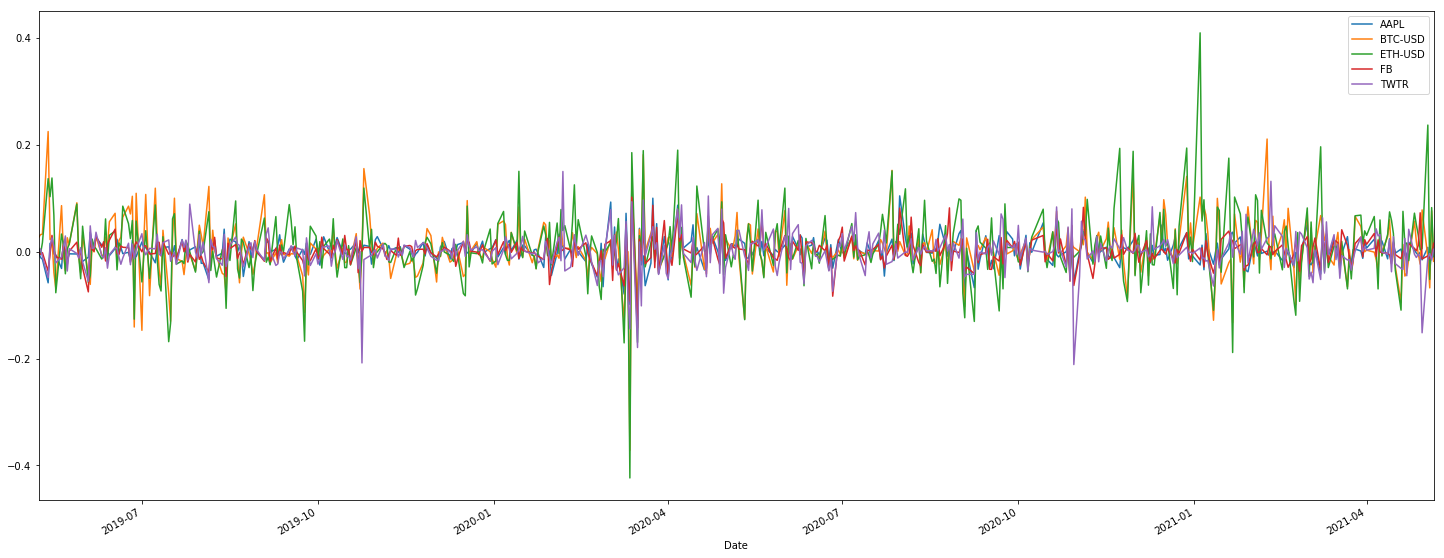

In [8]:
daily_returns.plot.line(figsize=(25,10))

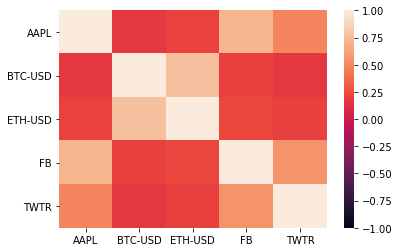

In [9]:
correlations = daily_returns.corr()
sns.heatmap(correlations, vmin=-1, vmax=1)

In [10]:
std_deviations = daily_returns.std()
annualized_std = (std_deviations * np.sqrt(252)).sort_values(ascending=False)
annualized_std

ETH-USD    0.975104
BTC-USD    0.771639
TWTR       0.547917
FB         0.380993
AAPL       0.379706
dtype: float64

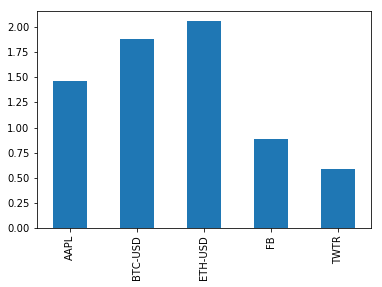

In [11]:
sharpe_ratios = ((daily_returns.mean() * 252)) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

In [12]:
# low risk portfolio - [1st - 5%, 2nd - 10%, 3rd - 15%, 4th- 20%, 5th - 50%] -- 80% investment , 20% lending
# medium risk portfolio - [1st - 10%, 2nd - 15%, 3rd - 20%, 4th- 25%, 5th - 30%] -- 60% investment , 40% lending
# high risk portfolio - [1st - 30%, 2nd - 25%, 3rd -20%, 4th- 15%, 5th - 10%] -- 50% investment , 50% lending
# ex. weights = [.05, .1, .15, .2, .5] --> daily_returns.dot(weights)


low_risk_weights = [.05, .1, .15, .2, .5]
med_risk_weights = [.1, .15, .2, .25, .3]
high_risk_weights = [.3, .25, .2, .15, .1]
volatitly_ranks = annualized_std.index.to_list()
print(volatitly_ranks)
ordered_volatility_df = pd.concat([daily_returns[volatitly_ranks[0]], daily_returns[volatitly_ranks[1]],daily_returns[volatitly_ranks[2]],daily_returns[volatitly_ranks[3]],daily_returns[volatitly_ranks[4]]], axis=1, join='inner')
low_risk_porfolio = ordered_volatility_df.dot(low_risk_weights)
med_risk_porfolio = ordered_volatility_df.dot(med_risk_weights)
high_risk_porfolio = ordered_volatility_df.dot(high_risk_weights)

['ETH-USD', 'BTC-USD', 'TWTR', 'FB', 'AAPL']


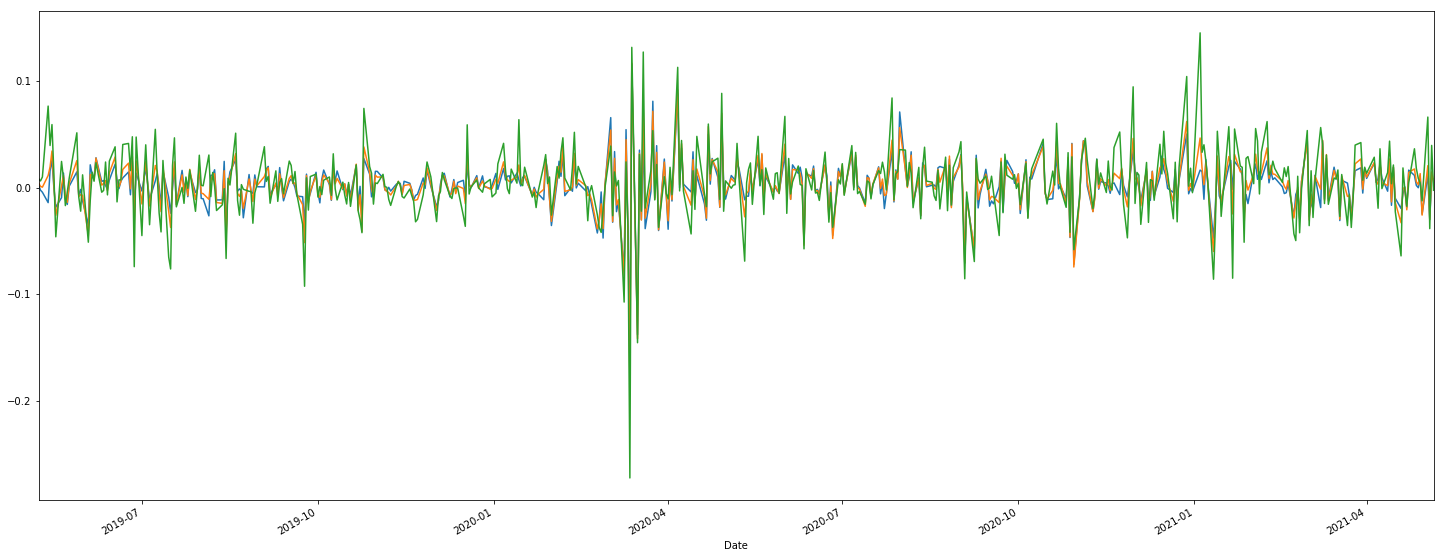

In [13]:
ax = low_risk_porfolio.plot.line(figsize=(25,10))
med_risk_porfolio.plot.line(ax=ax)
high_risk_porfolio.plot.line(ax=ax)

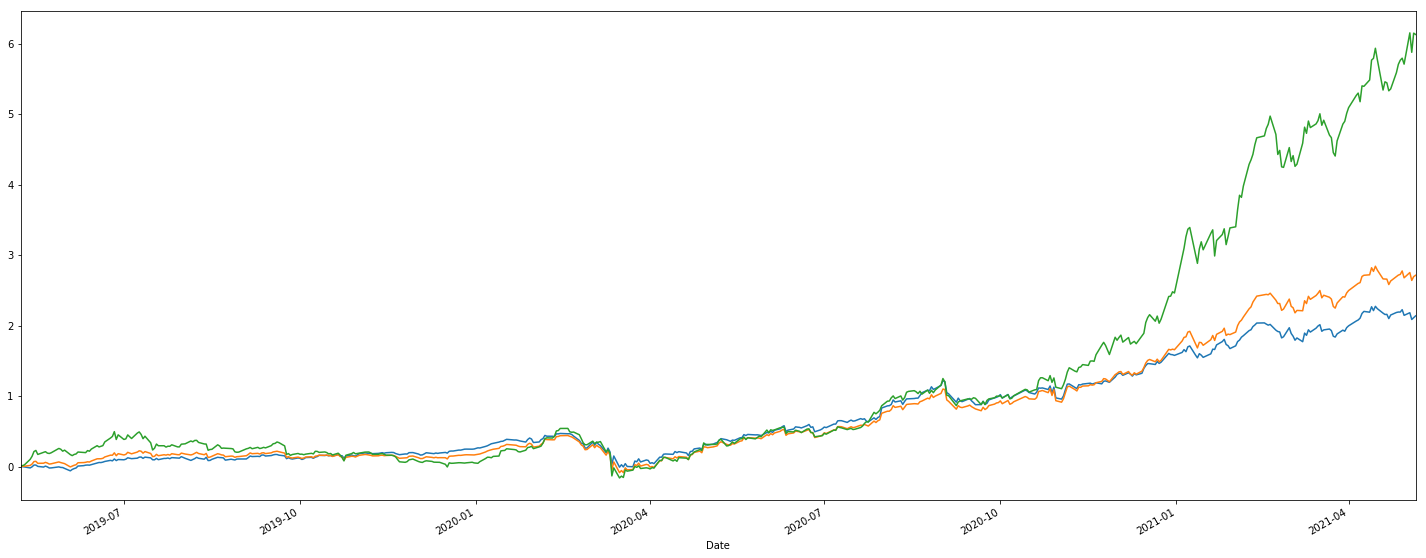

In [14]:
# STEP 3 - calculate cumulative returns from each portfolio
# calculate returns for each risk scenario using different weights
# calculate cumulative returns for each scenario
# show and calculate monte carlo simulation
# 3rd visualization - plot cumulative returns

low_risk_cumulative_returns = (1 + low_risk_porfolio).cumprod() - 1
med_risk_cumulative_returns = (1 + med_risk_porfolio).cumprod() - 1
high_risk_cumulative_returns = (1 + high_risk_porfolio).cumprod() - 1
ax = low_risk_cumulative_returns.plot(figsize=(25,10))
med_risk_cumulative_returns.plot(ax=ax)
high_risk_cumulative_returns.plot(ax=ax)

In [15]:
#pd.concat({'Foo': df}, names=['Firstlevel'])
ordered_close_by_volatility_df = pd.concat([df_closing[volatitly_ranks[0]], df_closing[volatitly_ranks[1]],df_closing[volatitly_ranks[2]],df_closing[volatitly_ranks[3]],df_closing[volatitly_ranks[4]]], axis=1, join='inner')
multi_level = pd.concat([ordered_close_by_volatility_df], axis=1, keys=['close']).swaplevel(0,1,1)
multi_level.head()

ETH-USD      BTC-USD       TWTR          FB       AAPL
                 close        close      close       close      close
Date                                                                 
2019-05-07  169.798660  5829.501465  38.619999  189.770004  49.590477
2019-05-08  170.948166  5982.457520  38.580002  189.539993  49.600250
2019-05-09  170.289307  6174.528809  38.790001  188.649994  49.067337
2019-05-10  173.142746  6378.849121  38.450001  188.339996  48.387592
2019-05-13  196.846283  7814.915039  36.590000  181.539993  45.575329

In [16]:
MC_low_risk = MCSimulation(
    portfolio_data = multi_level,
    weights = low_risk_weights,
    num_simulation = 100,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_low_risk.portfolio_data.head()

ETH-USD                   BTC-USD                    TWTR  \
                 close daily_return        close daily_return      close   
Date                                                                       
2019-05-07  169.798660          NaN  5829.501465          NaN  38.619999   
2019-05-08  170.948166     0.006770  5982.457520     0.026238  38.580002   
2019-05-09  170.289307    -0.003854  6174.528809     0.032106  38.790001   
2019-05-10  173.142746     0.016756  6378.849121     0.033091  38.450001   
2019-05-13  196.846283     0.136902  7814.915039     0.225129  36.590000   

                                 FB                    AAPL               
           daily_return       close daily_return      close daily_return  
Date                                                                      
2019-05-07          NaN  189.770004          NaN  49.590477          NaN  
2019-05-08    -0.001036  189.539993    -0.001212  49.600250     0.000197  
2019-05-09     0.005443  188.649994    -0.004696  49.067337    -0.010744  
2019-05-10    -0.008765  188.339996    -0.001643  48.387592    -0.013853  
2019-05-13    -0.048375  181.539993    -0.036105  45.575329    -0.058120

In [17]:
MC_med_risk = MCSimulation(
    portfolio_data = multi_level,
    weights = med_risk_weights,
    num_simulation = 100,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_med_risk.portfolio_data.head()

ETH-USD                   BTC-USD                    TWTR  \
                 close daily_return        close daily_return      close   
Date                                                                       
2019-05-07  169.798660          NaN  5829.501465          NaN  38.619999   
2019-05-08  170.948166     0.006770  5982.457520     0.026238  38.580002   
2019-05-09  170.289307    -0.003854  6174.528809     0.032106  38.790001   
2019-05-10  173.142746     0.016756  6378.849121     0.033091  38.450001   
2019-05-13  196.846283     0.136902  7814.915039     0.225129  36.590000   

                                 FB                    AAPL               
           daily_return       close daily_return      close daily_return  
Date                                                                      
2019-05-07          NaN  189.770004          NaN  49.590477          NaN  
2019-05-08    -0.001036  189.539993    -0.001212  49.600250     0.000197  
2019-05-09     0.005443  188.649994    -0.004696  49.067337    -0.010744  
2019-05-10    -0.008765  188.339996    -0.001643  48.387592    -0.013853  
2019-05-13    -0.048375  181.539993    -0.036105  45.575329    -0.058120

In [18]:
MC_high_risk = MCSimulation(
    portfolio_data = multi_level,
    weights = high_risk_weights,
    num_simulation = 100,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_high_risk.portfolio_data.head()

ETH-USD                   BTC-USD                    TWTR  \
                 close daily_return        close daily_return      close   
Date                                                                       
2019-05-07  169.798660          NaN  5829.501465          NaN  38.619999   
2019-05-08  170.948166     0.006770  5982.457520     0.026238  38.580002   
2019-05-09  170.289307    -0.003854  6174.528809     0.032106  38.790001   
2019-05-10  173.142746     0.016756  6378.849121     0.033091  38.450001   
2019-05-13  196.846283     0.136902  7814.915039     0.225129  36.590000   

                                 FB                    AAPL               
           daily_return       close daily_return      close daily_return  
Date                                                                      
2019-05-07          NaN  189.770004          NaN  49.590477          NaN  
2019-05-08    -0.001036  189.539993    -0.001212  49.600250     0.000197  
2019-05-09     0.005443  188.649994    -0.004696  49.067337    -0.010744  
2019-05-10    -0.008765  188.339996    -0.001643  48.387592    -0.013853  
2019-05-13    -0.048375  181.539993    -0.036105  45.575329    -0.058120

In [19]:
MC_low_risk.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


0          1          2          3          4          5   \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      1.009634   0.994286   0.990754   1.011345   1.004079   1.021202   
2      1.007230   0.984820   1.025169   1.015211   1.004620   1.032869   
3      1.039473   0.977502   1.033052   1.040721   1.020036   1.043177   
4      1.004000   0.967668   1.019073   1.056810   1.028055   1.043875   
5      1.005835   0.979553   1.010693   1.067348   1.019789   1.051459   
6      1.026611   0.971013   1.007530   1.086900   1.036055   1.036164   
7      0.997084   0.968985   1.014996   1.083248   1.021861   1.032827   
8      0.992428   0.975808   0.988653   1.115975   1.022433   1.026503   
9      0.993677   0.976414   0.993955   1.120329   1.014976   1.004175   
10     0.993784   0.972190   1.013371   1.118568   1.014069   1.028414   
11     0.998953   0.974681   1.019410   1.115951   1.012920   1.039908   
12     0.995279   1.017121   1.019690   1.125395   0.978076   1.032088   
13     1.003671   1.030348   1.016305   1.117999   0.979104   1.055892   
14     1.033445   1.048142   1.015188   1.151731   0.975806   1.066269   
15     1.025222   1.037096   1.011485   1.137206   0.971198   1.066747   
16     1.029618   1.056138   1.009772   1.116791   0.965024   1.054970   
17     1.042028   1.072201   1.027849   1.128573   0.985106   1.096574   
18     1.039502   1.073143   1.042704   1.134559   0.997862   1.103040   
19     1.041733   1.113445   1.010636   1.158687   0.985460   1.074400   
20     1.026432   1.110570   1.013430   1.189479   1.019918   1.054881   
21     1.034335   1.157308   1.008565   1.187657   1.021650   1.044038   
22     1.029482   1.158009   1.029114   1.163087   1.006869   1.070905   
23     1.042898   1.170908   1.031016   1.147335   1.012527   1.086870   
24     1.046858   1.203783   1.038591   1.129180   1.029138   1.126948   
25     1.023847   1.239202   1.064858   1.125782   1.007435   1.097830   
26     1.047139   1.278371   1.040323   1.136269   0.994159   1.108672   
27     1.100583   1.280516   1.039517   1.140590   1.003745   1.133472   
28     1.117186   1.267155   1.065717   1.159112   0.997598   1.100585   
29     1.142977   1.265313   1.079053   1.160958   1.006093   1.117530   
...         ...        ...        ...        ...        ...        ...   
1231  28.368000  22.206598  22.661455  31.304302  11.207770  22.649551   
1232  28.609830  21.916862  23.258261  30.914786  11.339737  22.778552   
1233  29.409076  22.100797  23.578070  30.663484  11.151623  23.054718   
1234  29.660675  22.052316  23.359606  30.653993  11.259089  23.638757   
1235  29.637138  22.182393  23.614559  31.861082  11.400591  23.173314   
1236  29.076018  22.413205  23.338881  32.599631  11.197160  23.955666   
1237  29.759710  22.973671  23.584107  32.224227  11.345937  23.521266   
1238  30.876220  22.868163  22.729857  31.692191  11.386041  23.992598   
1239  30.565694  22.655479  22.265802  32.236478  11.439068  23.636377   
1240  30.746479  23.437976  22.580836  31.792898  11.805238  24.191944   
1241  31.467396  23.805765  22.273051  31.598553  11.971087  23.924134   
1242  31.833151  23.796224  22.406793  31.218202  11.902682  24.359954   
1243  31.808371  23.806374  22.287171  31.786502  11.846493  24.334145   
1244  31.374971  24.188516  22.208238  32.092578  12.032764  25.198541   
1245  31.082930  24.375750  21.970211  32.616390  12.319764  25.156420   
1246  30.987341  24.690859  21.277589  33.318372  12.280891  24.761738   
1247  30.566028  24.733607  21.323365  33.106441  12.697352  25.491555   
1248  30.856188  25.455929  21.670699  33.605514  12.789377  25.631902   
1249  31.017312  24.985426  20.977882  34.169828  12.852085  25.683392   
1250  31.697281  24.871385  21.032382  34.572619  12.801572  25.678799   
1251  31.524240  25.296111  21.379569  34.260513  12.634513  26.009296   
1252  31.420544  25.771980  21.459463  33.898113  12.729661  25.665584   
1253  31.699957  

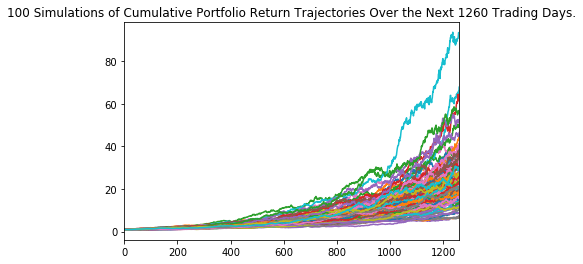

In [20]:
low_risk_plot = MC_low_risk.plot_simulation()

In [21]:
low_risk_table = MC_low_risk.summarize_cumulative_return()
print(low_risk_table)

count           100.000000
mean             24.325578
std              13.722004
min               6.464361
25%              15.249971
50%              21.143024
75%              29.961966
max              92.512820
95% CI Lower      7.091446
95% CI Upper     58.949945
Name: 1260, dtype: float64


In [22]:
MC_med_risk.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


0          1          2          3          4          5   \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      0.994343   0.989984   1.005685   0.999053   0.993687   1.017398   
2      0.997563   1.001322   1.004435   0.985558   0.982834   1.001695   
3      1.002104   1.014298   1.005501   0.981221   0.985777   0.993915   
4      1.001421   1.021567   1.008656   0.980423   1.002436   0.992267   
5      1.014928   1.033008   1.022934   1.001693   0.999934   0.998998   
6      1.038555   1.052099   1.013719   1.021110   1.013680   1.020084   
7      1.039552   1.064458   0.981130   0.989888   1.022100   1.041121   
8      1.061538   1.090403   1.003675   1.020718   1.020156   1.066129   
9      1.058172   1.133588   1.004970   1.007679   1.031592   1.055191   
10     1.068642   1.127876   0.993799   1.014622   1.025052   1.067421   
11     1.058230   1.138874   0.995911   1.013838   1.012960   1.073976   
12     1.082107   1.156246   1.000198   0.996084   1.007106   1.103562   
13     1.069958   1.156375   1.014080   0.992128   1.020523   1.090620   
14     1.037776   1.170885   1.001755   1.007303   1.016177   1.102525   
15     1.038745   1.143580   1.010409   1.009549   1.029971   1.117318   
16     1.039535   1.151659   1.023561   1.013315   1.070786   1.100180   
17     1.061973   1.159731   1.038996   1.015544   1.057549   1.098894   
18     1.070538   1.171930   1.042807   1.051115   1.018015   1.101071   
19     1.051601   1.175938   1.068614   1.086848   1.025679   1.084887   
20     1.072919   1.154561   1.055590   1.086564   1.051025   1.084348   
21     1.072077   1.140262   1.089628   1.087440   1.077519   1.095244   
22     1.073583   1.146175   1.125842   1.090793   1.059423   1.067778   
23     1.073320   1.130401   1.116777   1.085988   1.045972   1.031704   
24     1.045583   1.110486   1.152321   1.114295   1.047037   1.032461   
25     1.038843   1.111653   1.108283   1.093470   1.044361   1.049305   
26     1.060350   1.131563   1.117734   1.111924   1.046193   1.054301   
27     1.059079   1.132647   1.098992   1.113887   1.037451   1.077286   
28     1.053649   1.121043   1.091336   1.114359   1.048650   1.088620   
29     1.073693   1.134638   1.105802   1.124909   1.048186   1.092108   
...         ...        ...        ...        ...        ...        ...   
1231  29.620925  24.387612  32.593741  36.042051  24.113901  13.425559   
1232  29.996639  24.718541  32.246879  36.937278  24.566768  13.519998   
1233  30.613067  24.720199  31.595563  37.379276  25.141874  13.503098   
1234  30.500938  24.678647  31.316277  37.227738  24.739133  13.469752   
1235  30.620842  25.296325  31.092672  37.817871  24.874697  13.241475   
1236  30.134703  25.240868  30.803950  36.542648  24.777815  13.134760   
1237  30.104423  25.285421  30.805671  37.343314  24.949492  13.213905   
1238  30.068858  25.642756  30.756774  37.963310  24.594792  13.383621   
1239  30.438884  25.977883  31.524244  38.252762  24.613656  13.443481   
1240  30.755282  26.905658  31.985331  38.008125  24.524025  13.128981   
1241  30.963291  27.189488  32.010990  37.631656  24.126332  13.417412   
1242  31.087097  27.762409  32.180164  36.752230  23.829151  13.311096   
1243  31.036561  28.713312  32.396982  36.391168  23.759384  13.224518   
1244  30.885779  28.991667  32.682574  36.543920  24.218609  13.637902   
1245  31.706454  29.560029  32.020442  36.121556  24.169540  14.001136   
1246  32.266603  29.263063  32.362809  36.132076  23.871989  13.943977   
1247  32.304259  29.577713  32.675497  36.768131  24.119757  13.794075   
1248  32.272708  30.307176  33.609244  37.193463  23.805177  13.554559   
1249  32.250861  30.198465  33.985027  37.215303  23.445947  13.006808   
1250  33.637756  31.412481  33.926842  37.561119  23.553083  12.882456   
1251  33.062496  31.161270  33.368985  37.931137  23.969583  13.377893   
1252  32.995804  30.774630  34.102005  37.936707  23.472311  13.422879   
1253  33.735584  

In [23]:
med_risk_table = MC_med_risk.summarize_cumulative_return()
print(med_risk_table)

count           100.000000
mean             36.924301
std              19.917079
min               7.861487
25%              24.445544
50%              33.171829
75%              43.842161
max             127.178125
95% CI Lower     13.100502
95% CI Upper     93.067015
Name: 1260, dtype: float64


In [24]:
MC_high_risk.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


0          1           2          3          4           5   \
0       1.000000   1.000000    1.000000   1.000000   1.000000    1.000000   
1       1.004694   0.989390    1.005812   1.029306   1.010844    0.972620   
2       1.011201   1.046920    1.055428   1.050910   1.002705    0.962053   
3       1.011073   1.065520    1.097664   1.042376   0.998257    0.966293   
4       1.029687   1.102861    1.044757   1.083299   0.979719    0.932096   
5       1.017176   1.097074    1.065907   1.098885   0.981904    0.903864   
6       0.997977   1.106429    1.083313   1.091131   0.990008    0.944878   
7       0.994635   1.083959    1.085160   1.078714   0.944894    0.949256   
8       0.985312   1.080350    1.123366   1.111735   0.935450    0.945143   
9       1.026903   1.110147    1.120779   1.075614   0.940139    0.937251   
10      1.017131   1.103869    1.080350   1.084595   0.929268    0.942250   
11      1.008695   1.112799    1.093194   1.064162   0.872825    0.956615   
12      1.009808   1.169750    1.081052   1.046852   0.866491    0.969026   
13      0.992101   1.191357    1.119141   1.090796   0.827303    0.974726   
14      1.028685   1.202412    1.163324   1.081017   0.838669    0.950191   
15      1.049180   1.241712    1.172906   1.109504   0.878474    0.974848   
16      1.059857   1.270376    1.140232   1.139122   0.868220    0.983472   
17      1.098018   1.248056    1.158770   1.134693   0.881871    1.016415   
18      1.104389   1.275957    1.210085   1.138517   0.896785    1.043368   
19      1.157260   1.310174    1.259201   1.129999   0.905599    1.039555   
20      1.166401   1.321407    1.223113   1.108165   0.877573    1.034239   
21      1.201151   1.348774    1.225424   1.100285   0.869677    1.035256   
22      1.214568   1.389789    1.235448   1.093226   0.845847    0.976373   
23      1.233478   1.461378    1.244322   1.102870   0.865202    0.990009   
24      1.239545   1.490681    1.254958   1.109459   0.862019    1.011848   
25      1.263801   1.535486    1.226123   1.079800   0.858067    1.009116   
26      1.285754   1.531323    1.188724   1.062147   0.859668    1.015477   
27      1.250475   1.514103    1.166886   1.074003   0.865335    1.017228   
28      1.186329   1.568602    1.139856   1.081410   0.884319    1.016789   
29      1.216157   1.508824    1.140023   1.057630   0.887118    1.021427   
...          ...        ...         ...        ...        ...         ...   
1231  682.640360  43.968977  191.612901  77.576779  44.958648  104.410024   
1232  694.546153  44.057284  193.496517  80.377395  44.114231  100.353390   
1233  702.848715  42.999791  193.802943  79.989541  43.427762  102.004986   
1234  693.300927  42.100247  190.294273  81.989551  44.210246  101.280599   
1235  679.448251  44.466702  185.218513  82.670376  42.810991  102.752258   
1236  681.899181  44.411546  187.981646  83.693481  43.306969  102.228327   
1237  679.745947  45.963728  186.792994  82.972478  43.407684  101.217520   
1238  720.499261  48.321683  182.726109  85.870320  44.612125  101.922910   
1239  693.587252  47.154243  183.001022  88.744080  44.549766  101.152064   
1240  693.003579  47.895497  178.692341  87.545899  44.215032  100.204858   
1241  703.021557  47.558377  174.944192  86.927217  42.766625  102.099436   
1242  685.748174  47.427862  176.016822  86.838936  43.193083  106.451856   
1243  693.106133  47.812164  180.011173  84.176231  42.069098  108.052333   
1244  695.636821  46.875104  180.773998  85.588147  40.693968  106.923654   
1245  709.057040  44.968937  181.502218  87.108313  40.286739  109.054712   
1246  685.161735  45.227169  179.709595  88.105121  40.581503  108.105671   
1247  693.768434  45.236928  179.710691  88.478333  41.273926  114.491527   
1248  703.070723  46.706805  186.753164  88.289611  41.468507  112.458842   
1249  698.183798  47.397296  185.444558  91.410276  42.231558  112.218360   
1250  681.676018  46.042957  185.929099  93.665995  41.998138  108.555862   
1251  688.

In [25]:
high_risk_table = MC_high_risk.summarize_cumulative_return()
print(high_risk_table)

count            100.000000
mean             268.677213
std              210.131265
min               30.627596
25%              120.798622
50%              220.983659
75%              346.556017
max             1003.497151
95% CI Lower      41.846033
95% CI Upper     891.419277
Name: 1260, dtype: float64


In [26]:
 # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
low_risk_ci_lower = round(low_risk_table[8]*15000,2)
low_risk_ci_upper = round(low_risk_table[9]*15000,2)
med_risk_ci_lower = round(med_risk_table[8]*15000,2)
med_risk_ci_upper = round(med_risk_table[9]*15000,2)
high_risk_ci_lower = round(high_risk_table[8]*15000,2)
high_risk_ci_upper = round(high_risk_table[9]*15000,2)
# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the low risk portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${low_risk_ci_lower} and ${low_risk_ci_upper}.")

print(f"There is a 95% chance that an initial investment of $15,000 in the medium risk portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${med_risk_ci_lower} and ${med_risk_ci_upper}.")

print(f"There is a 95% chance that an initial investment of $15,000 in the high risk portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${high_risk_ci_lower} and ${high_risk_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the low risk portfolio over the next 5 years will end within in the range of $106371.69 and $884249.18.
There is a 95% chance that an initial investment of $15,000 in the medium risk portfolio over the next 5 years will end within in the range of $196507.54 and $1396005.23.
There is a 95% chance that an initial investment of $15,000 in the high risk portfolio over the next 5 years will end within in the range of $627690.5 and $13371289.16.


In [27]:
daily_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [33]:
def get_dr():
    return daily_returns.hvplot()


In [38]:
def get_sharp():
    return sharpe_ratios.hvplot.bar()


In [39]:

daily_returns_col = pn.Column('## Daily Returns', get_dr())
sharp_ratios_col = pn.Column('## Sharp Ratios', get_sharp())

In [42]:
tabs = pn.Tabs(("returns",daily_returns_col), ("sharps",sharp_ratios_col))

In [43]:
dashboard = pn.Column('# Analysis', tabs)

In [44]:
dashboard

Column
    [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] HoloViews(NdOverlay)
        [1] Column
            [0] Markdown(str)
            [1] HoloViews(Bars)